# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [46]:

# importing required libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px 
import plotly.io as pio 
import seaborn as sns
pio.renderers.default = 'svg'

from sklearn.model_selection import train_test_split


In [47]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [48]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

All features in dataset marked as non-null, hence we don't need seperate handling of null values.

In [50]:
df.select_dtypes(object).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


Above set of features of object type are categorical and encoding is required. 

In [51]:
df['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

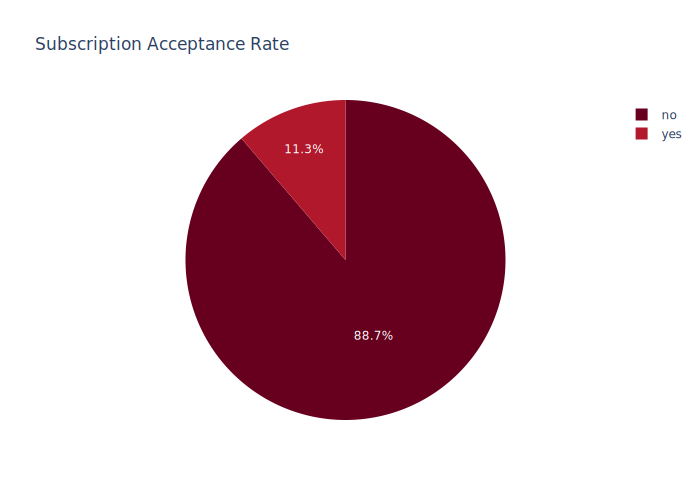

In [52]:
palette_color = sns.color_palette('bright') 
fig = px.pie(df, names='y' ,title='Subscription Acceptance Rate' ,color_discrete_sequence=px.colors.sequential.RdBu)
fig.show()

In [53]:
df['y'] = df['y'].map({'no': 0, 'yes': 1})

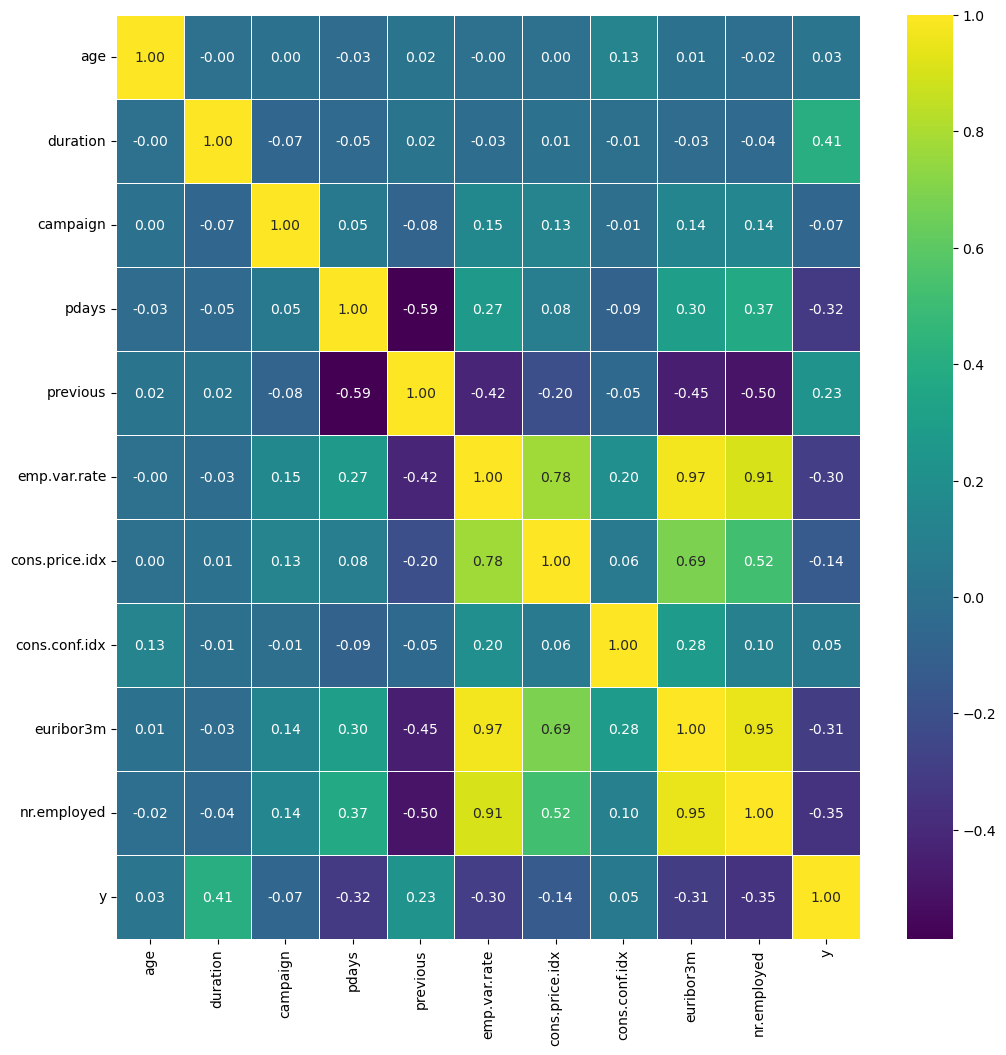

In [54]:
df_numeric = df.select_dtypes(include=np.number)
plt.figure(figsize=(12,12))
sns.heatmap(df_numeric.corr(),annot=True,linewidths=0.6,fmt=".2f",cmap="viridis")
plt.show()

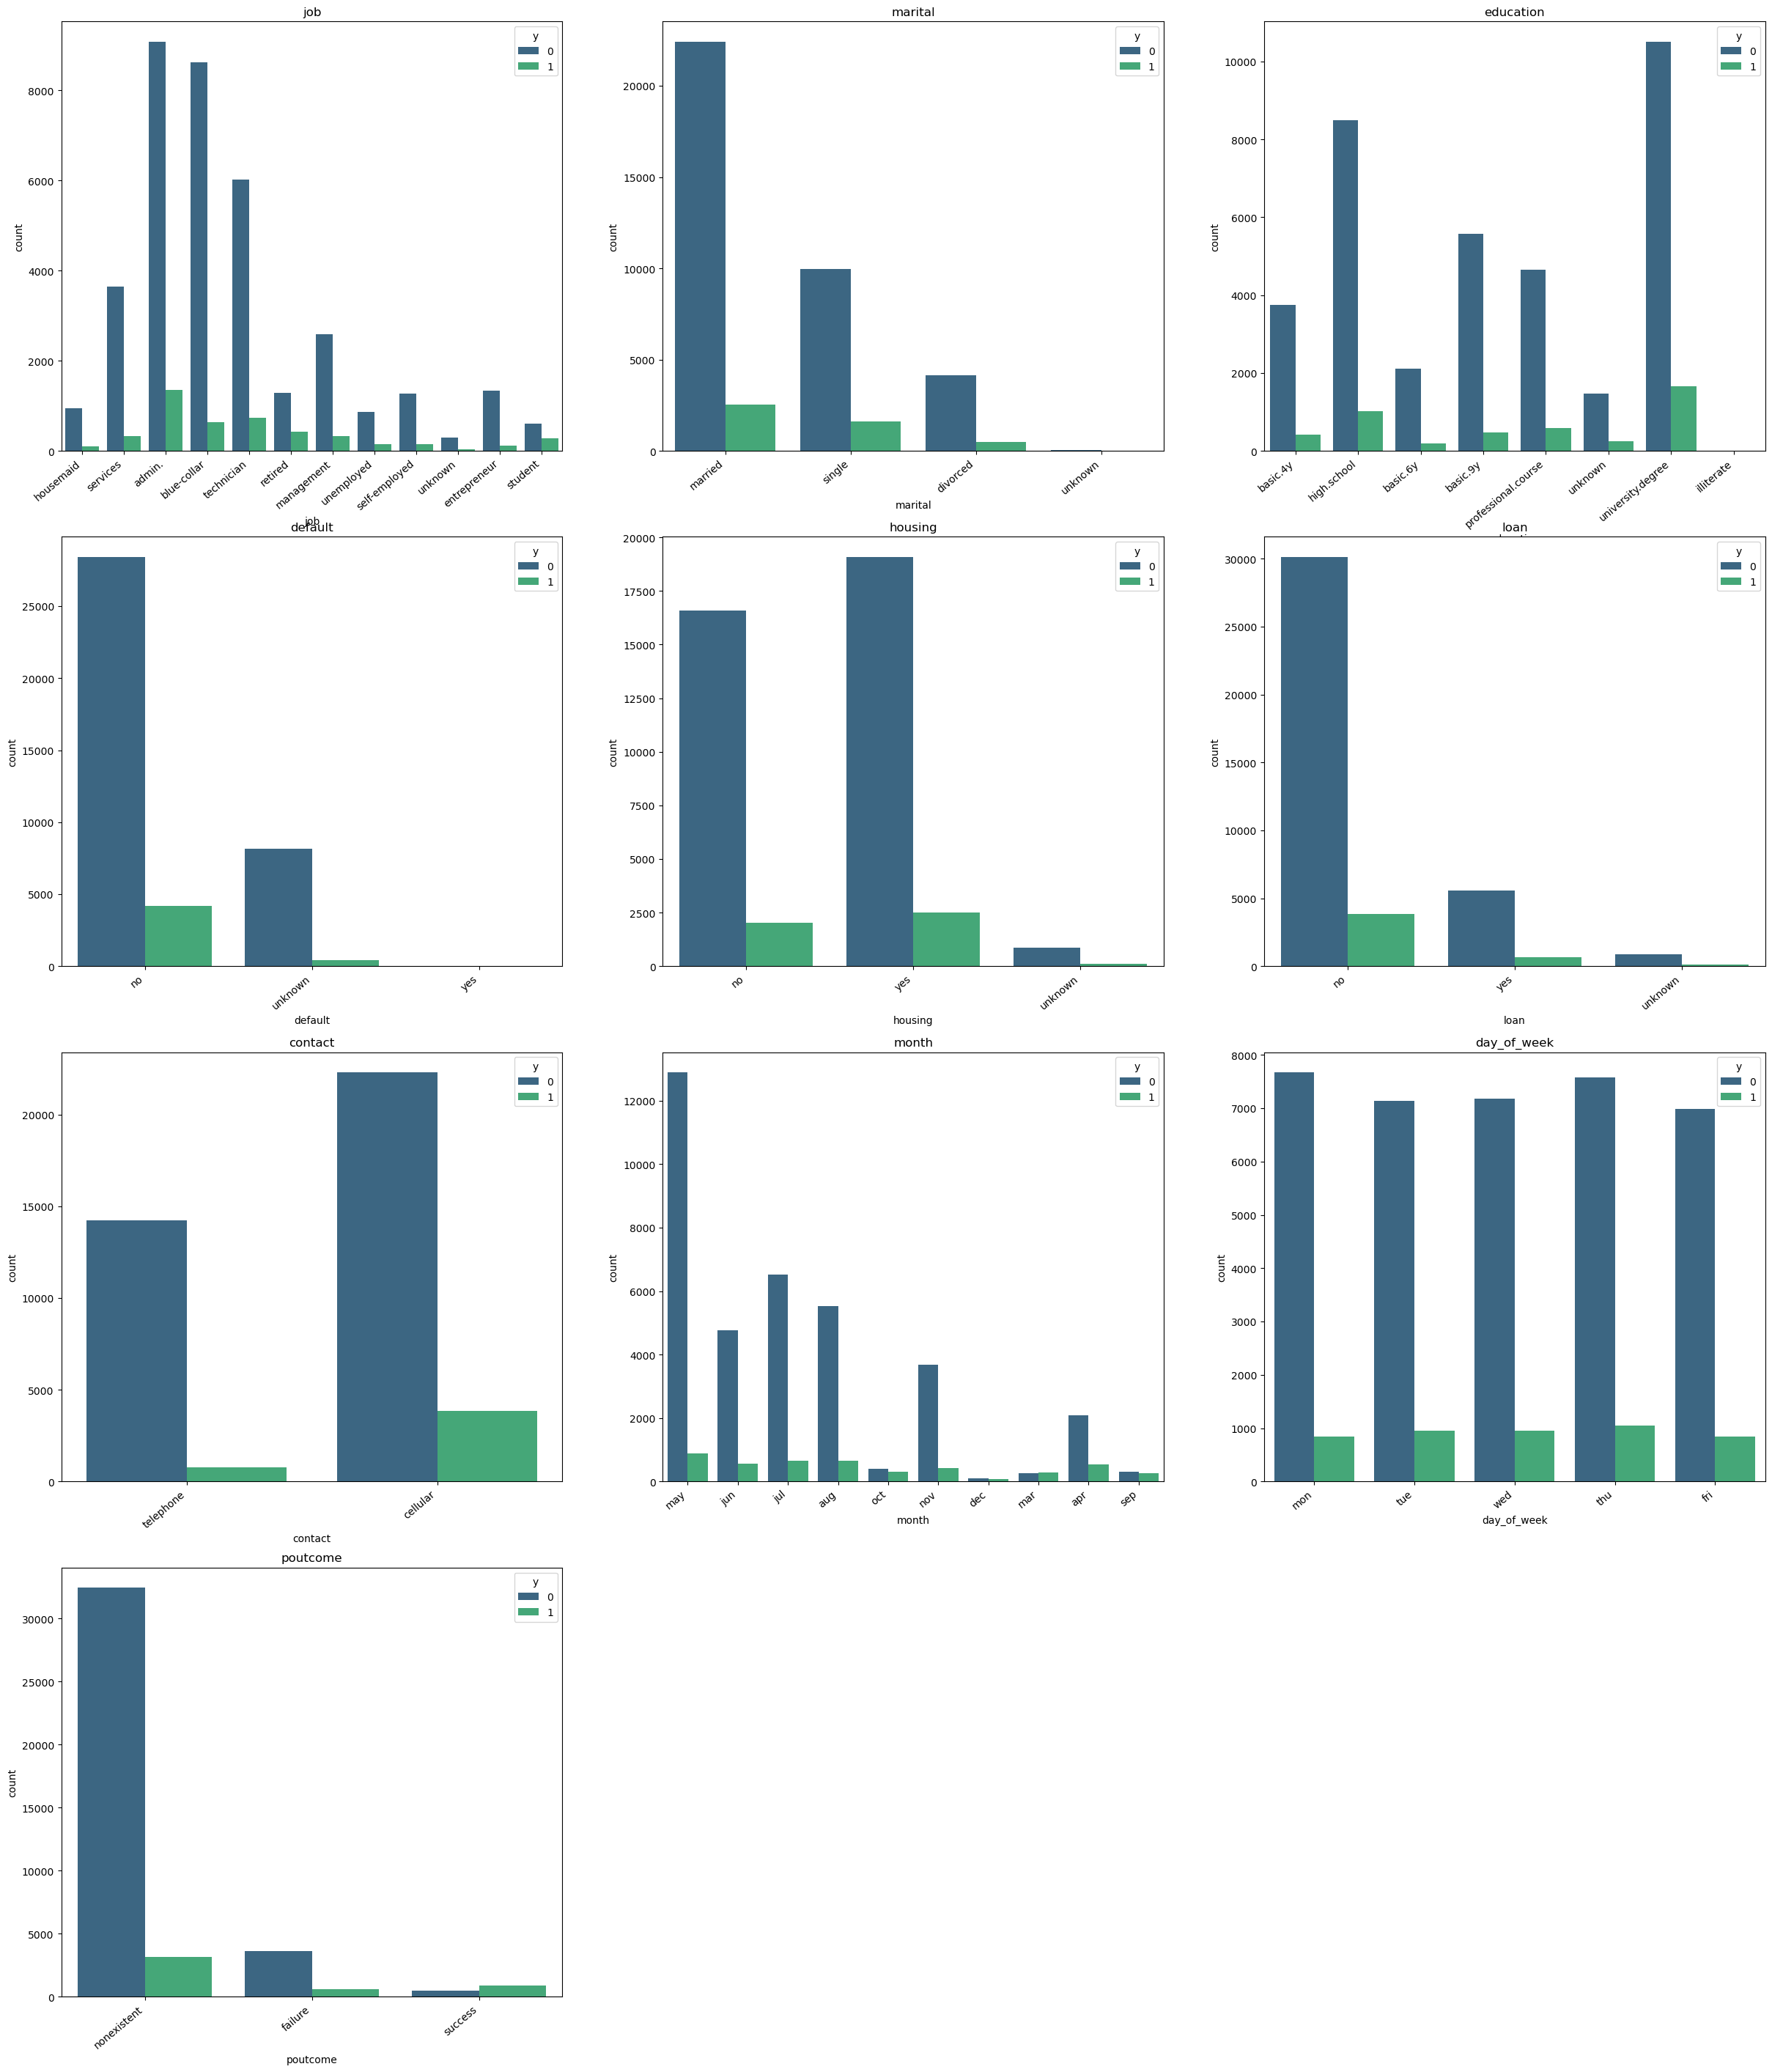

In [79]:
cat_list = list(df.select_dtypes(object))
k=1

plt.figure(figsize=(30,35))
for i in cat_list:
    plt.subplot(4,3,k)
    ax =sns.countplot(x = i, data = df.loc[:,cat_list],hue=df['y'], palette='viridis')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
    plt.title(i)
    k += 1


From above graphs, following is the analysis on features 
- Students and retired Job categories have higher percentage of acceptance rate.
- Single customers have better percentage of acceptance rate compared to married and divorced.
- In the months September,March,October and December observed high acceptanace rate.
- Customers with their credit status as not defaulted shown high acceptance rate.
- Customers contacted with cellular has better acceptance rate than on telephone.


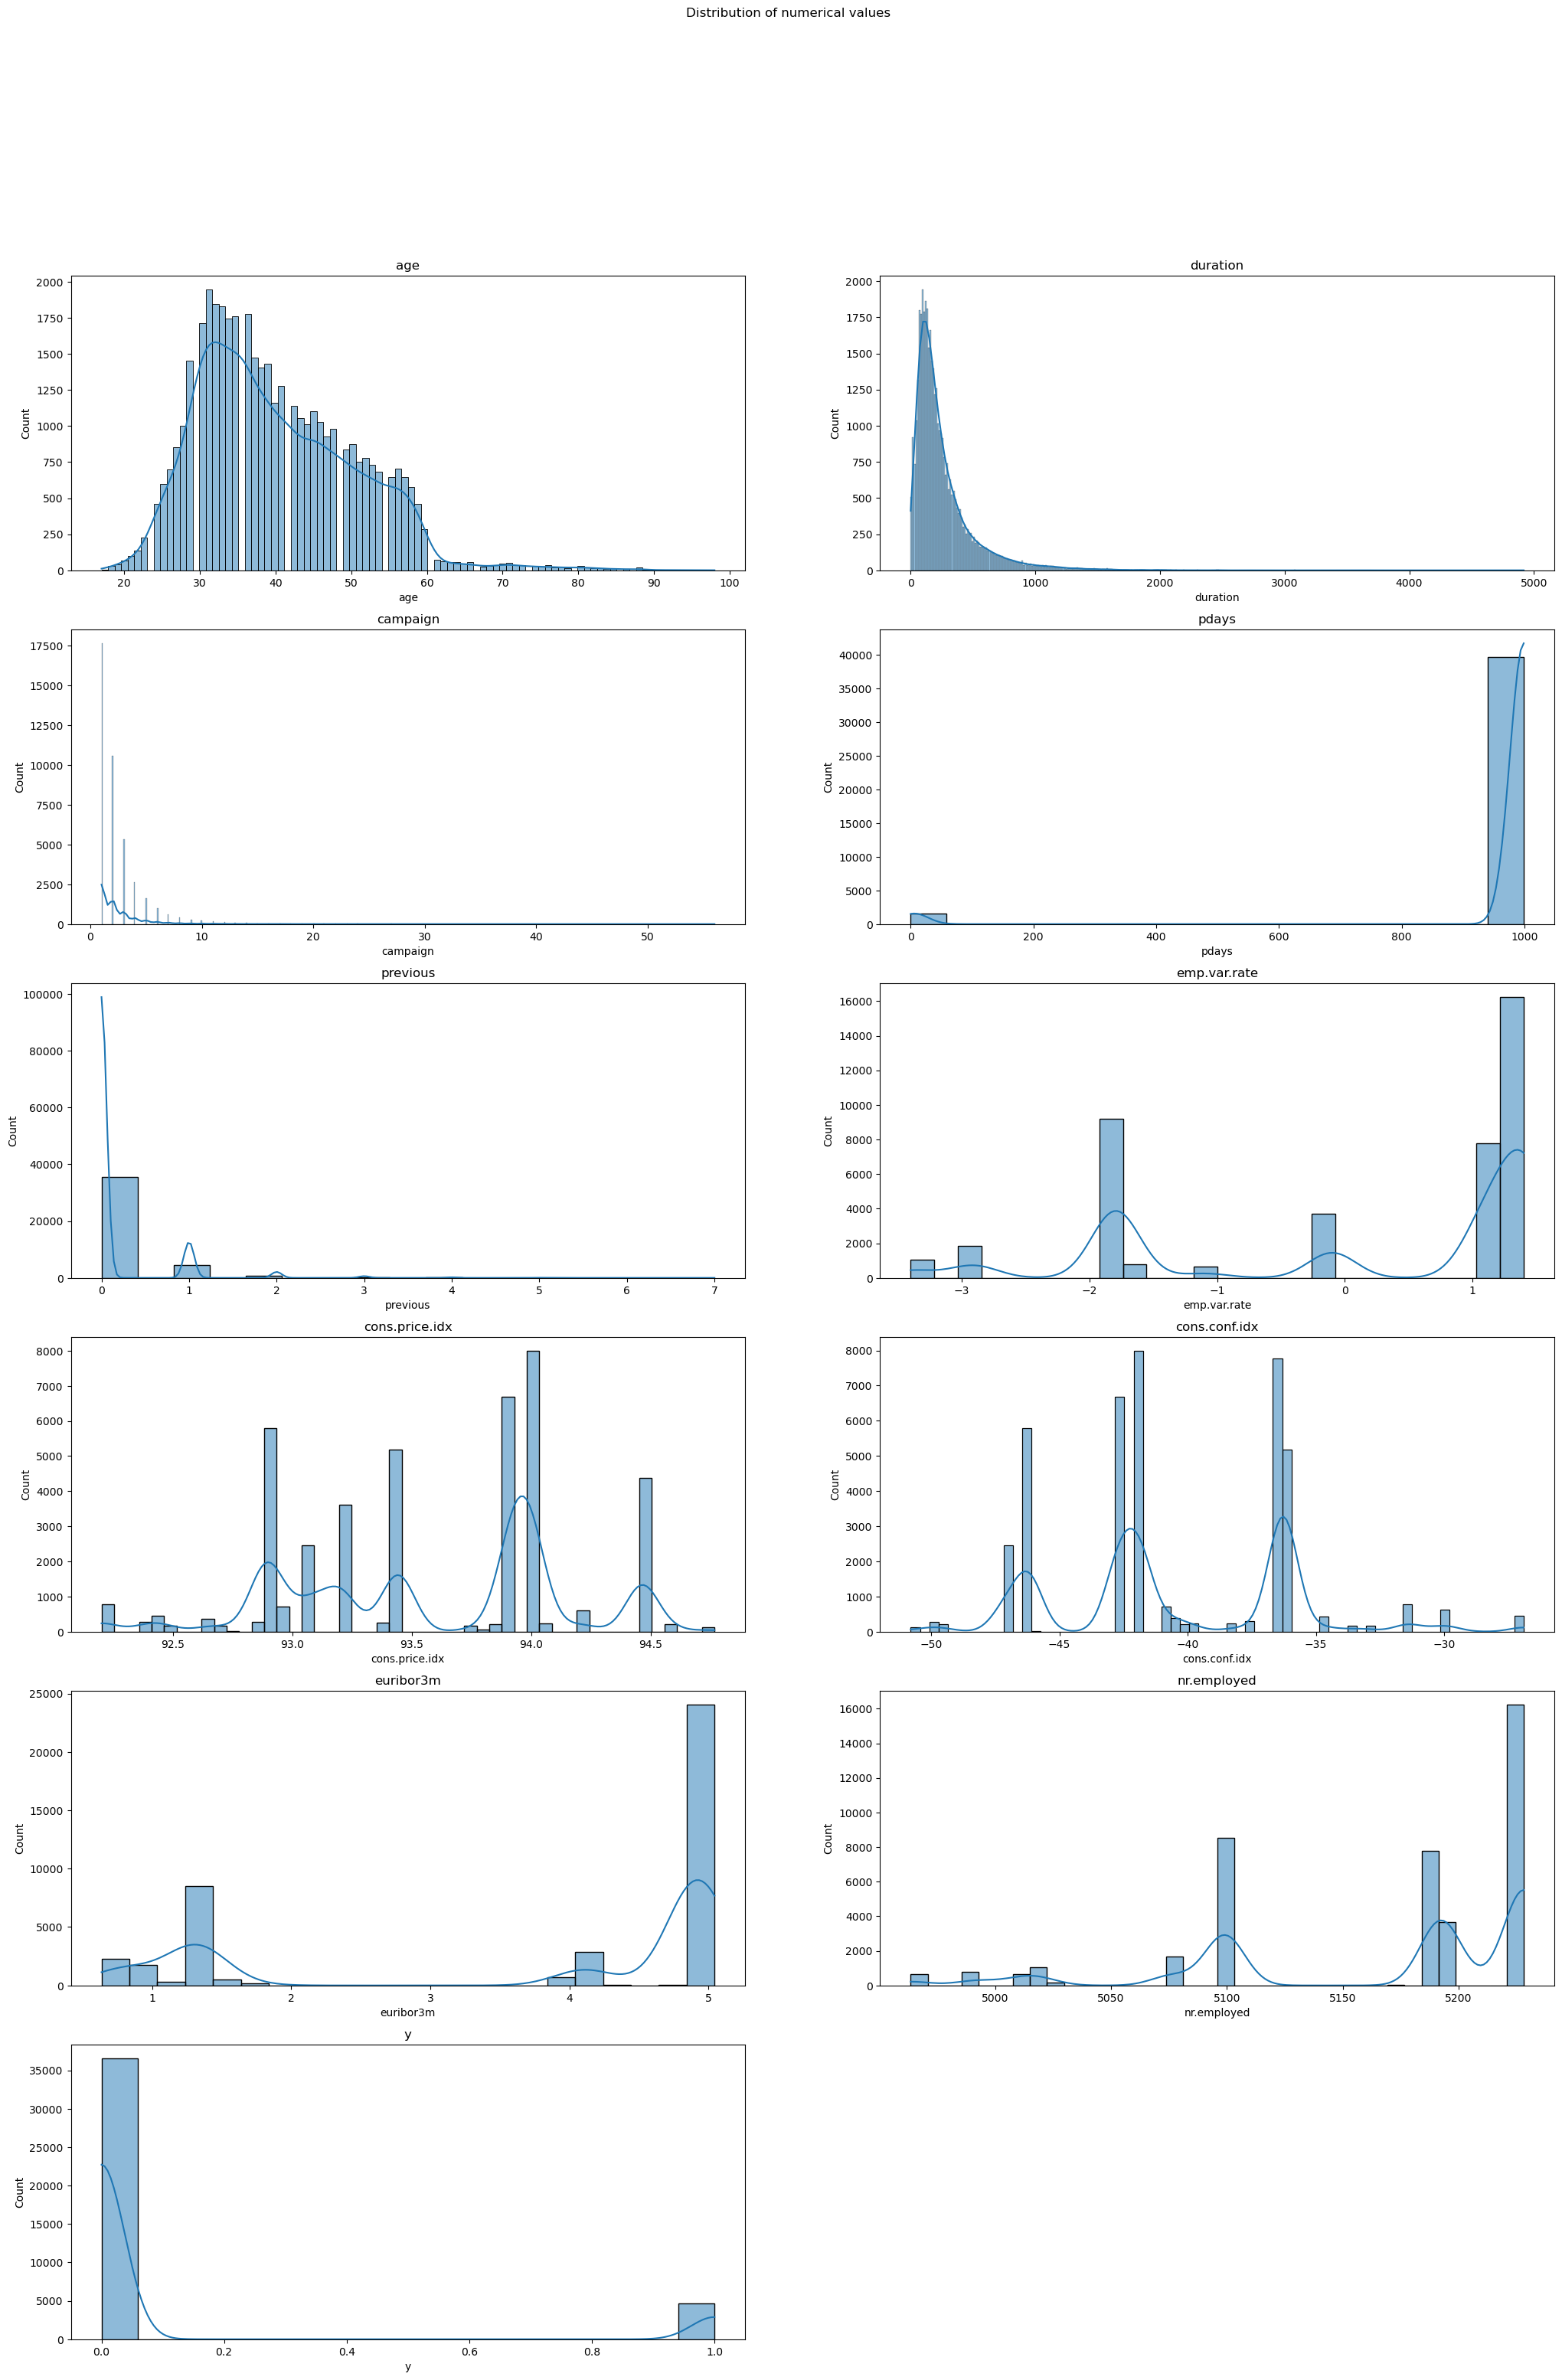

In [56]:
num_list = list(df.select_dtypes(np.number))
k=1
plt.figure(figsize=(25,35))
plt.suptitle("Distribution of numerical values")


for i in df.loc[:,num_list]:
    plt.subplot(6,2,k)
    sns.histplot(df[i],kde=True)
    
    plt.title(i)
    k+=1
    

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [58]:
import pandas as pd 
import time 
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import GridSearchCV


In [59]:
#Encoding Categoraical features with OneHotEncoder 

#Original DataFrame with category feature columns 1-7  and age 
df_sub = df[['job', 'marital', 'education', 'housing', 'loan', 'contact', 'default','age']]

#Extract categorical columns 1-7 from the dataframe
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'default']

#Initialize OneHotEncoder 
encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df_sub[categorical_columns])

one_hot_df = pd.DataFrame(one_hot_encoded,columns=encoder.get_feature_names_out(categorical_columns))

df_encoded = pd.concat([df_sub, one_hot_df], axis=1)

df_encoded = df_encoded.drop(categorical_columns, axis=1)

df_encoded.head()

# Applying Standard Sacler to numerical columns of dataframe
numeric_columns = ['age']

scaler =  StandardScaler()
scaler_encoded = scaler.fit_transform(df_encoded[numeric_columns])
df_encoded[numeric_columns] = scaler_encoded

df_encoded.head()


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,default_no,default_unknown,default_yes
0,1.533034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.628993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,-0.002309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [60]:
X_train,X_test,y_train,y_test = train_test_split(df_encoded,df['y'],test_size=0.25)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [61]:
dummy_calssifier = DummyClassifier(strategy="most_frequent")
dummy_calssifier.fit(X_train,y_train)

y_train_predict = dummy_calssifier.predict(X_train)
y_test_predict = dummy_calssifier.predict(X_test)

print("Accuracy score for train Data :: ", accuracy_score(y_train,y_train_predict))
print("Accuracy Score for test Data :: ",accuracy_score(y_test,y_test_predict))


Accuracy score for train Data ::  0.8877666634294779
Accuracy Score for test Data ::  0.8860833252403613


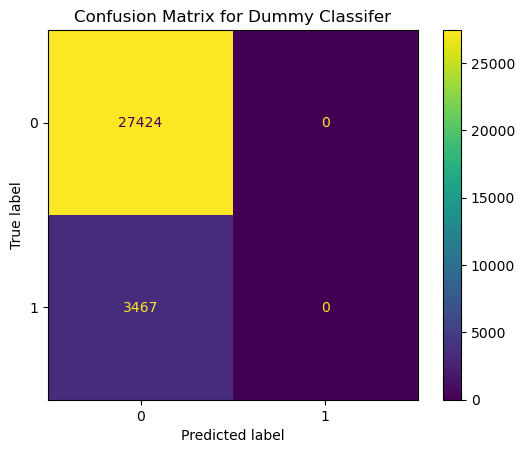

In [62]:
cm = confusion_matrix(y_train, y_train_predict, labels=dummy_calssifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=dummy_calssifier.classes_)

disp.plot()
plt.title('Confusion Matrix for Dummy Classifer')
plt.show()


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [63]:
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [64]:
lr_train_pred = logisticReg.predict(X_train)
lr_test_pred = logisticReg.predict(X_test)

print('Logistic Regression Train Score ::' ,accuracy_score(y_train, lr_train_pred))
print('Logistic Regression Test Score ::' ,accuracy_score(y_test, lr_test_pred))

Logistic Regression Train Score :: 0.8877666634294779
Logistic Regression Test Score :: 0.8860833252403613


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [65]:
models = [
    {
        'model': LogisticRegression(max_iter=1000),
        'key': 'Logistic Regression'
    },
    {
        'model': SVC(),
        'key': 'SVM'
    },
    {
        'model': KNeighborsClassifier(),
        'key': 'KNN'
    },
    {
        'model': DecisionTreeClassifier(),
        'key': 'Decision Tree'
    },
]

output = {}

for model in models:
    print('Model : ', model['key'])
    current_model = model['model']
    start_t = time.time()
    current_model.fit(X_train, y_train)
    end_t = time.time()
    y_train_pred = current_model.predict(X_train)
    y_test_pred = current_model.predict(X_test)
    output[model['key']] = {
        'train_time' : end_t-start_t,
        'train_accuracy': accuracy_score(y_train,y_train_pred),
        'test_accuracy' : accuracy_score(y_test,y_test_pred),
        'train_f1' : f1_score(y_train,y_train_pred,average='weighted',labels=np.unique(y_train_pred)),
        'test_f1' : f1_score(y_test,y_test_pred,average='weighted',labels=np.unique(y_test_pred))
        
    }
    
    print(classification_report(y_test, y_test_pred))

df_output = pd.DataFrame(output).transpose()
df_output.index.name='Model'
print(df_output)

Model :  Logistic Regression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9124
           1       0.00      0.00      0.00      1173

    accuracy                           0.89     10297
   macro avg       0.44      0.50      0.47     10297
weighted avg       0.79      0.89      0.83     10297

Model :  SVM
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9124
           1       0.46      0.01      0.01      1173

    accuracy                           0.89     10297
   macro avg       0.67      0.50      0.47     10297
weighted avg       0.84      0.89      0.83     10297

Model :  KNN
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      9124
           1       0.32      0.08      0.12      1173

    accuracy                           0.88     10297
   macro avg       0.60      0.53      0.53     10297
weighted avg       

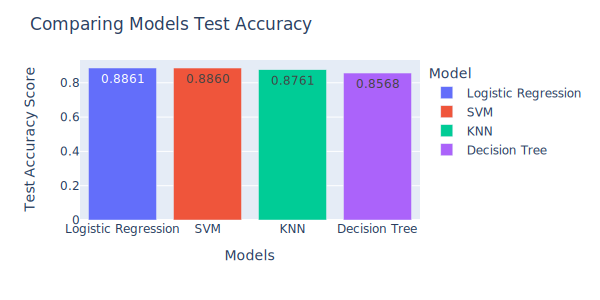

In [66]:
fig = px.bar(df_output,y='test_accuracy', x=df_output.index, color=df_output.index, text_auto='.4f', width=600, height=300)
fig.update_layout(title='Comparing Models Test Accuracy',
                  yaxis_title='Test Accuracy Score',
                  xaxis_title='Models')
fig.show()

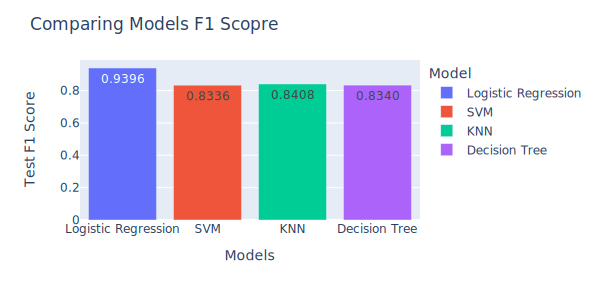

In [67]:
fig = px.bar(df_output,y='test_f1', x=df_output.index, color=df_output.index, text_auto='.4f', width=600, height=300)
fig.update_layout(title='Comparing Models F1 Scopre',
                  yaxis_title='Test F1 Score',
                  xaxis_title='Models')
fig.show()

Logistic Regression outperforms other models, given its superior testing F1 score and accuracy, especially in light of the dataset's imbalance

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [68]:

# Applying Standard Sacler to numerical columns of dataframe
more_numeric_columns = ['emp.var.rate','euribor3m', 'previous', 'pdays',  'nr.employed']


scaler =  StandardScaler()
scaler_more_encoded = scaler.fit_transform(df[more_numeric_columns])
df_encoded[more_numeric_columns] = scaler_more_encoded

df_encoded.head()

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,contact_cellular,contact_telephone,default_no,default_unknown,default_yes,emp.var.rate,euribor3m,previous,pdays,nr.employed
0,1.533034,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.648092,0.71246,-0.349494,0.195414,0.33168
1,1.628993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.648092,0.71246,-0.349494,0.195414,0.33168
2,-0.290186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.648092,0.71246,-0.349494,0.195414,0.33168
3,-0.002309,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.648092,0.71246,-0.349494,0.195414,0.33168
4,1.533034,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.648092,0.71246,-0.349494,0.195414,0.33168


In [69]:
X_train, X_test, y_train, y_test = train_test_split(df_encoded, df['y'], test_size=0.3)

In [71]:
gridsearch_output = {}

best_values ={}

models = [
    {
        'model': LogisticRegression(),
        'params': {'solver': ['lbfgs','liblinear' ],'max_iter': np.arange(500, 1000, 2000) },
        'key': 'Logistic Regression'
    },
    {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [10, 50, 100, 200], 'algorithm': ['auto',  'kd_tree', 'brute','ball_tree'],},
        'key': 'KNN'
    },
    
    {
        'model': SVC(),
        'params': {'kernel': ['rbf', 'poly', 'linear'], 'gamma': ['scale', 'auto']},
        'key': 'SVM'
    },
    {
        'model': DecisionTreeClassifier(),
        'params': { 
            'max_depth': [2, 5, 10],
            'min_samples_split': [0.1, 0.2, 0.05],
            'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05]
                    },
        'key': 'Decision Tree'
    }
]
output = {}
for model in models:
    print('Model : ', model['key'])
    grid_search = GridSearchCV(model['model'], model['params'], cv=5, scoring='f1')
    
    start_t = time.time()
    grid_search.fit(X_train, y_train)
    end_t = time.time()
    
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    
    best_values[model['key']] = { 'model': best_model, 'params': best_params }
    
    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)
    print("Best parameters: ", best_params)
    print("Training time: ", end_t - start_t)
    print(classification_report(y_test, y_test_pred, labels=np.unique(y_test_pred)))
    output[model['key']] = {
        'train_time' : end_t-start_t,
        'train_accuracy': accuracy_score(y_train,y_train_pred),
        'test_accuracy' : accuracy_score(y_test,y_test_pred),
        'train_f1' : f1_score(y_train,y_train_pred,average='weighted',labels=np.unique(y_train_pred)),
        'test_f1' : f1_score(y_test,y_test_pred,average='weighted',labels=np.unique(y_test_pred))
        
    }
print(best_values)



Model :  Logistic Regression
Best parameters:  {'max_iter': 500, 'solver': 'lbfgs'}
Training time:  0.7024838924407959
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11000
           1       0.66      0.21      0.31      1357

    accuracy                           0.90     12357
   macro avg       0.79      0.60      0.63     12357
weighted avg       0.88      0.90      0.88     12357

Model :  KNN
Best parameters:  {'algorithm': 'auto', 'n_neighbors': 50}
Training time:  95.10344982147217
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     11000
           1       0.69      0.21      0.32      1357

    accuracy                           0.90     12357
   macro avg       0.80      0.60      0.63     12357
weighted avg       0.89      0.90      0.88     12357

Model :  SVM
Best parameters:  {'gamma': 'scale', 'kernel': 'linear'}
Training time:  679.921462059021
              prec

In [73]:
df_gs_output = pd.DataFrame(output).transpose()
df_gs_output.index.name = 'model'
print(df_gs_output)

                     train_time  train_accuracy  test_accuracy  train_f1  \
model                                                                      
Logistic Regression    0.702484        0.896882       0.901351  0.872470   
KNN                   95.103450        0.897818       0.902808  0.873441   
SVM                  679.921462        0.895182       0.902970  0.870869   
Decision Tree          2.994609        0.886130       0.890184  0.939627   

                      test_f1  
model                          
Logistic Regression  0.877439  
KNN                  0.878850  
SVM                  0.879999  
Decision Tree        0.941902  


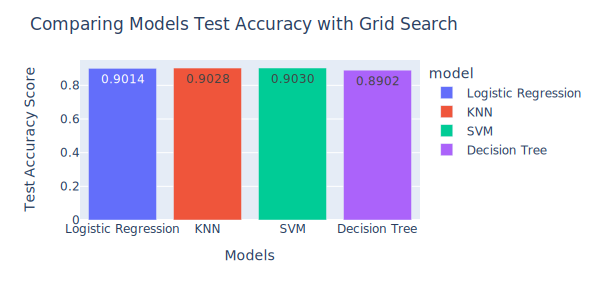

In [74]:
fig = px.bar(df_gs_output,y='test_accuracy', x=df_gs_output.index, color=df_gs_output.index, text_auto='.4f', width=600, height=300)
fig.update_layout(title='Comparing Models Test Accuracy with Grid Search',
                  yaxis_title='Test Accuracy Score',
                  xaxis_title='Models')
fig.show()

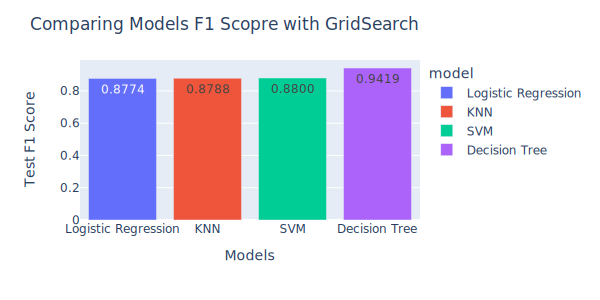

In [75]:
fig = px.bar(df_gs_output,y='test_f1', x=df_gs_output.index, color=df_gs_output.index, text_auto='.4f', width=600, height=300)
fig.update_layout(title='Comparing Models F1 Scopre with GridSearch',
                  yaxis_title='Test F1 Score',
                  xaxis_title='Models')
fig.show()

Considering the additional features depicted in the above graphs, the SVM model achieves the highest accuracy score (0.9030), while the Decision Tree exhibits the highest test F1 score (0.9419). Given the dataset's imbalance, prioritizing the F1 score, the Decision Tree emerges as the optimal model

##### Questions